In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# Data Analysis and Visualization


In [2]:
# load the data
#data = pd.read_excel("DAILY_LOGS_YEAR_2015.xlsx",  sep = ',', header= None )
data1 = pd.read_excel("../data/DAILY LOGS YEAR 2014.xlsx" )
data2 = pd.read_excel("../data/DAILY LOGS YEAR 2015.xlsx" )
data2.columns=data1.columns
data3 = pd.read_excel("../data/DAILY LOGS YEAR 2016.xlsx" )
data3.columns=data1.columns
data4 = pd.read_excel("../data/DAILY LOGS YEAR 2017.xlsx" )
data4.columns=data1.columns
data5 = pd.read_excel("../data/DAILY LOGS YEAR 2018.xlsx" )
data5.columns=data1.columns
data6 = pd.read_excel("../data/DAILY LOGS YEAR 2019.xlsx" )
data6.columns=data1.columns
data7 = pd.read_excel("../data/DAILY LOGS YEAR 2020.xlsx" )
data7.columns=data1.columns
data8 = pd.read_excel("../data/DAILY LOGS YEAR 2021.xlsx" )
data8.columns=data1.columns




In [3]:
#Merging data of years (2014-2021)
df_main = pd.concat((data1,data2,data3,data4,data5,data6,data7,data8), ignore_index=True)

In [4]:
#displaying the first five rows DataFrame
df_main.head()

,DATE,AREA,VOLUME,CONDITION LEVEL,WIND DIRECTION,MOON PHASE,CURRENT,TEMPERATURE
0,2014-01-01,CACATAN,100.0,3.0,NE,NaN,S,NaN
1,2014-01-01,CACATAN,242.0,3.0,NE,NaN,S,NaN
2,2014-01-01,LUGUS,156.0,3.0,NE,NaN,S,NaN
3,2014-01-01,LUGUS,97.0,3.0,NE,NaN,S,NaN
4,2014-01-01,BAMBANAN,119.0,3.0,NE,NaN,SW,NaN


In [5]:
#displaying the last five rows DataFrame
df_main.tail()

,DATE,AREA,VOLUME,CONDITION LEVEL,WIND DIRECTION,MOON PHASE,CURRENT,TEMPERATURE
36866,2021-12-30,DRILLINGS SOUTH,0.0,3.0,NE,NaN,SWW,28.9°C
36867,2021-12-30,MANG LUBOT LUBOT,115.0,3.0,NE,NaN,NWW,28.1°C
36868,2021-12-30,WEST GALOK,146.0,3.0,NE,NaN,SE,29.3°C
36869,2021-12-30,WEST GALOK,29.0,3.0,NE,NaN,SE,29.3°C
36870,2021-12-30,WEST NALAOT,62.0,3.0,NE,NaN,SSE,29.2°C


In [6]:
#Delete empty columns
emp_col=['TEMPERATURE','MOON PHASE']
df_main =df_main.drop(emp_col, axis = 1)
df_main.head()

,DATE,AREA,VOLUME,CONDITION LEVEL,WIND DIRECTION,CURRENT
0,2014-01-01,CACATAN,100.0,3.0,NE,S
1,2014-01-01,CACATAN,242.0,3.0,NE,S
2,2014-01-01,LUGUS,156.0,3.0,NE,S
3,2014-01-01,LUGUS,97.0,3.0,NE,S
4,2014-01-01,BAMBANAN,119.0,3.0,NE,SW


In [7]:
#Display the shape of DataFrame
df_main.shape

(36871, 6)

In [8]:
# check missing values in the dataset 
df_main.isnull().sum()
df_main.reset_index(drop=True, inplace=True)

In [9]:
# Delete rows containing missing values using dropna() function  
df_main=df_main.dropna()

In [10]:
# check to make sure missing values are removed
df_main.isnull().sum()

DATE               0
AREA               0
VOLUME             0
CONDITION LEVEL    0
WIND DIRECTION     0
CURRENT            0
dtype: int64

In [11]:
#Display summary statistics of numerical data
df_main['VOLUME'].describe()

count    35262.000000
mean       280.924366
std        383.645678
min          0.000000
25%         40.000000
50%        150.000000
75%        368.000000
max      11122.000000
Name: VOLUME, dtype: float64

Text(0, 0.5, 'Frequency')

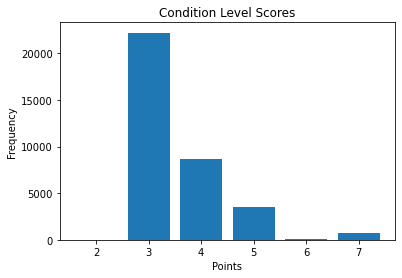

In [12]:
#Bar chart to visualize the frequency of any categorical feature e.g CONDITION LEVEL.
#value_counts method is used to calculate the frequency of each category in  condition level feature
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data_1 = df_main['CONDITION LEVEL'].value_counts() 
# get x and y data 
points = data_1.index 
frequency = data_1.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Condition Level Scores') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

/home/sajid/anaconda3/envs/project/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


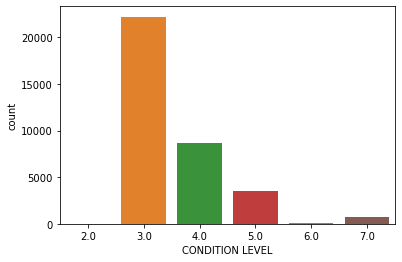

In [144]:
sns.countplot(df_main['CONDITION LEVEL'])
plt.show()

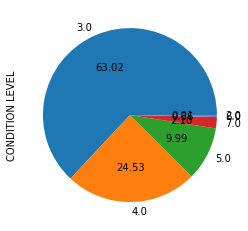

In [145]:
#Pie-plot of CONDITION LEVEL feature
df_main['CONDITION LEVEL'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

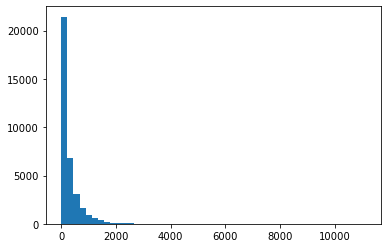

In [146]:
#Histogram of VOLUME feature
#A histogram is a value distribution plot of numerical columns. It basically creates bins in various ranges in values 
#and plots it where we can visualize how values are distributed
plt.hist(df_main['VOLUME'], bins=50)
plt.show()

/home/sajid/anaconda3/envs/project/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


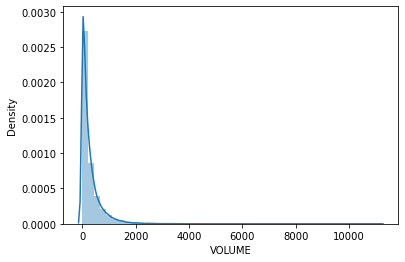

In [147]:
sns.distplot(df_main['VOLUME']) 
plt.show()

# Feature Engineering

In [13]:
#To extract date and time features from DATE column
#The data type of DATE column must be datetime object 
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35262 entries, 0 to 36870
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DATE             35262 non-null  datetime64[ns]
 1   AREA             35262 non-null  object        
 2   VOLUME           35262 non-null  float64       
 3   CONDITION LEVEL  35262 non-null  float64       
 4   WIND DIRECTION   35262 non-null  object        
 5   CURRENT          35262 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 1.9+ MB


In [14]:
import datetime

In [15]:
df_main['month'] = df_main['DATE'].dt.month
df_main['day'] = df_main['DATE'].dt.day
df_main['year'] = df_main['DATE'].dt.year
df_main['dayofweek'] = df_main['DATE'].dt.dayofweek

In [16]:
df_main.head()

,DATE,AREA,VOLUME,CONDITION LEVEL,WIND DIRECTION,CURRENT,month,day,year,dayofweek
0,2014-01-01,CACATAN,100.0,3.0,NE,S,1,1,2014,2
1,2014-01-01,CACATAN,242.0,3.0,NE,S,1,1,2014,2
2,2014-01-01,LUGUS,156.0,3.0,NE,S,1,1,2014,2
3,2014-01-01,LUGUS,97.0,3.0,NE,S,1,1,2014,2
4,2014-01-01,BAMBANAN,119.0,3.0,NE,SW,1,1,2014,2


In [17]:
# check missing values in the dataset 
df_main.isnull().sum()

DATE               0
AREA               0
VOLUME             0
CONDITION LEVEL    0
WIND DIRECTION     0
CURRENT            0
month              0
day                0
year               0
dayofweek          0
dtype: int64

In [18]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35262 entries, 0 to 36870
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DATE             35262 non-null  datetime64[ns]
 1   AREA             35262 non-null  object        
 2   VOLUME           35262 non-null  float64       
 3   CONDITION LEVEL  35262 non-null  float64       
 4   WIND DIRECTION   35262 non-null  object        
 5   CURRENT          35262 non-null  object        
 6   month            35262 non-null  int64         
 7   day              35262 non-null  int64         
 8   year             35262 non-null  int64         
 9   dayofweek        35262 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.0+ MB


In [19]:
col_int=["day","month","dayofweek","CONDITION LEVEL"]

In [22]:
for i in col_int:
    df_main[i] = df_main[i].apply(str)
    print(i)

day
month
dayofweek
CONDITION LEVEL


In [23]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35262 entries, 0 to 36870
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DATE             35262 non-null  datetime64[ns]
 1   AREA             35262 non-null  object        
 2   VOLUME           35262 non-null  float64       
 3   CONDITION LEVEL  35262 non-null  object        
 4   WIND DIRECTION   35262 non-null  object        
 5   CURRENT          35262 non-null  object        
 6   month            35262 non-null  object        
 7   day              35262 non-null  object        
 8   year             35262 non-null  int64         
 9   dayofweek        35262 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 3.0+ MB


# Visualize the highest volume of product with respect to other features

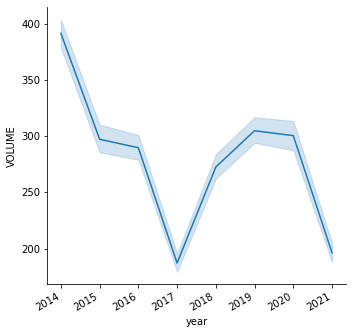

In [153]:
#Line plot tovisualize the highest volume of product on yearly basis
g = sns.relplot(x=df_main['year'], y=df_main["VOLUME"], kind="line", data=df_main)
g.figure.autofmt_xdate()

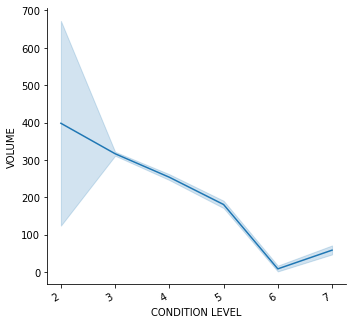

In [154]:
#Line plot between volume and condition level(subset of data for visualisation purpose)
g = sns.relplot(x=df_main['CONDITION LEVEL'], y=df_main["VOLUME"], kind="line", data=df_main)
g.figure.autofmt_xdate()

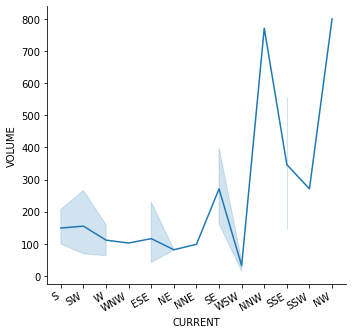

In [155]:
#Line plot between volume and current(subset of data for visualisation purpose)
g = sns.relplot(x=df_main.iloc[0:50, 5], y=df_main["VOLUME"], kind="line", data=df_main)
g.figure.autofmt_xdate()

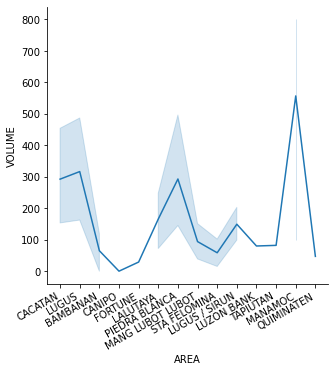

In [156]:
#Line plot between volume and area(subset of data for visualisation purpose)
g = sns.relplot(x=df_main.iloc[0:50, 1], y=df_main["VOLUME"], kind="line", data=df_main)
g.figure.autofmt_xdate()

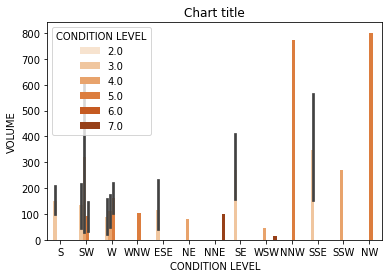

In [157]:
#Creating the bar plot to compare the values in certain groups and sub-groups
index_no = df_main.columns.get_loc('CURRENT')#extracting index no of feature, we want to plot on x-axis
#hue is the class 
sns.barplot(y = 'VOLUME',x=df_main.iloc[0:50,index_no],hue = 'CONDITION LEVEL',data = df_main, palette = "Oranges")
#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('CONDITION LEVEL')
plt.ylabel('VOLUME') 
# Show the plot
plt.show()

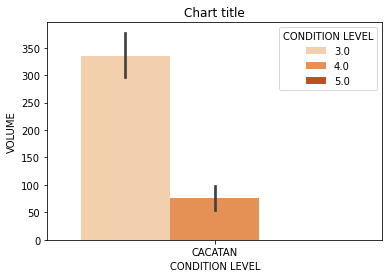

In [158]:
#Creating the bar plot to compare the values in certain groups and sub-groups e.g specific area with multiple condition levels
#hue is the class 
x_df=df_main.loc[df_main['AREA']== 'CACATAN']
sns.barplot(y = 'VOLUME',x='AREA',hue = 'CONDITION LEVEL',data = x_df, palette = "Oranges")
#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('CONDITION LEVEL')
plt.ylabel('VOLUME') 
# Show the plot
plt.show()

In [24]:
df=df_main.copy()

In [25]:
#LABEL ENCODER
#Import label encoder
from sklearn import preprocessing
def labelenc(df,col_enc):
# #     print(df)
    print(col_enc)
    label_encoder = preprocessing.LabelEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
    df[col_enc]= label_encoder.fit_transform(df[col_enc])
    return df
 
# df['AREA'].unique()







In [26]:
lst_categ=["AREA","WIND DIRECTION","CURRENT","year"]

In [27]:
for i in lst_categ:
    df_main_1=labelenc(df,i)


AREA
WIND DIRECTION
CURRENT
year


In [28]:
df_main_1.isnull().sum()

DATE               0
AREA               0
VOLUME             0
CONDITION LEVEL    0
WIND DIRECTION     0
CURRENT            0
month              0
day                0
year               0
dayofweek          0
dtype: int64

In [29]:
df_main_1.head()

,DATE,AREA,VOLUME,CONDITION LEVEL,WIND DIRECTION,CURRENT,month,day,year,dayofweek
0,2014-01-01,78,100.0,3.0,5,29,1,1,0,2
1,2014-01-01,78,242.0,3.0,5,29,1,1,0,2
2,2014-01-01,229,156.0,3.0,5,29,1,1,0,2
3,2014-01-01,229,97.0,3.0,5,29,1,1,0,2
4,2014-01-01,26,119.0,3.0,5,42,1,1,0,2


In [30]:
df_main_1 =df_main_1.drop("DATE", axis = 1)
df_main_1.reset_index(drop=True, inplace=True)

In [31]:
df_main_1.head()

,AREA,VOLUME,CONDITION LEVEL,WIND DIRECTION,CURRENT,month,day,year,dayofweek
0,78,100.0,3.0,5,29,1,1,0,2
1,78,242.0,3.0,5,29,1,1,0,2
2,229,156.0,3.0,5,29,1,1,0,2
3,229,97.0,3.0,5,29,1,1,0,2
4,26,119.0,3.0,5,42,1,1,0,2


In [32]:
df_main_1.isnull().sum()

AREA               0
VOLUME             0
CONDITION LEVEL    0
WIND DIRECTION     0
CURRENT            0
month              0
day                0
year               0
dayofweek          0
dtype: int64

# Feature Selection

In [33]:
#prepare data for feature selection
x=df_main_1.loc[:, df_main_1.columns!='VOLUME']
y=df_main_1.loc[:,df_main_1.columns=='VOLUME']
x.head()

,AREA,CONDITION LEVEL,WIND DIRECTION,CURRENT,month,day,year,dayofweek
0,78,3.0,5,29,1,1,0,2
1,78,3.0,5,29,1,1,0,2
2,229,3.0,5,29,1,1,0,2
3,229,3.0,5,29,1,1,0,2
4,26,3.0,5,42,1,1,0,2


In [34]:
y.head()

,VOLUME
0,100.0
1,242.0
2,156.0
3,97.0
4,119.0


In [35]:
y.isnull().sum()

VOLUME    0
dtype: int64

In [36]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=8,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [37]:
sfs.fit(x, y)
sfs.k_feature_names_ 

('AREA',
 'CONDITION LEVEL',
 'WIND DIRECTION',
 'CURRENT',
 'month',
 'day',
 'year',
 'dayofweek')

/home/sajid/anaconda3/envs/project/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sajid/anaconda3/envs/project/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


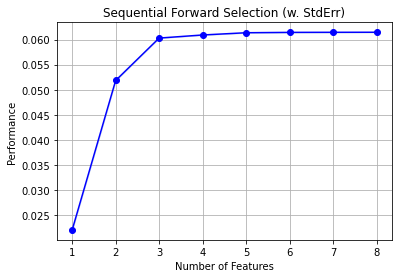

In [38]:
#to find out the optimal number of significant features we can use the hit and trial method for different values 
#of k_features and make the final decision by plotting it against the model performance.
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

# Outlier Detection

In [39]:
from numpy.random import randn
from numpy import mean
from numpy import std
...
# calculate summary statistics
data_mean, data_std = mean(df_main_1['VOLUME']), std(df_main_1['VOLUME'])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [40]:
# outliers = [x for x in df_main_1['VOLUME'] if x < lower or x > upper]

In [41]:
for i,x in enumerate (df_main_1['VOLUME']):
#     x=df_2.iloc[i][2]
    if x < lower or x > upper:
        df_main_1.loc[i,'outlier']='outlier'
        print("value of volume",x)
        print("lower",lower)
        print("upper",upper)
        print("//////////////////////////////////////")
        print('value is outlier')
        print("/////////////////////////////////////")
    else:
        df_main_1.loc[i,'outlier']='non-outlier'
#         print(i)

value of volume 1700.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2313.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1573.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2619.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2363.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2354.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
////////////////////////////////////

value of volume 1908.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1582.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 3048.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1515.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2610.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2078.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
////////////////////////////////////

value of volume 1546.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1586.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2741.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2191.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2017.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1542.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
////////////////////////////////////

value of volume 1710.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1750.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1994.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1631.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2635.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1611.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
////////////////////////////////////

value of volume 1525.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1672.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2713.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1706.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1508.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1855.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
////////////////////////////////////

value of volume 3062.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1869.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1699.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2071.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1478.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1585.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
////////////////////////////////////

value of volume 1543.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 4033.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1941.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1834.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1608.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2472.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
////////////////////////////////////

value of volume 1545.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2471.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 5059.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2260.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1938.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1516.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
////////////////////////////////////

value of volume 2693.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1524.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2908.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2143.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1490.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2914.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
////////////////////////////////////

value of volume 3774.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2080.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1460.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1767.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2890.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1883.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
////////////////////////////////////

value of volume 1944.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1473.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 11122.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1583.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 2019.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
/////////////////////////////////////
value of volume 1892.0
lower -869.9963489134811
upper 1431.8450812599162
//////////////////////////////////////
value is outlier
///////////////////////////////////

In [42]:
df_main_1.head()

,AREA,VOLUME,CONDITION LEVEL,WIND DIRECTION,CURRENT,month,day,year,dayofweek,outlier
0,78,100.0,3.0,5,29,1,1,0,2,non-outlier
1,78,242.0,3.0,5,29,1,1,0,2,non-outlier
2,229,156.0,3.0,5,29,1,1,0,2,non-outlier
3,229,97.0,3.0,5,29,1,1,0,2,non-outlier
4,26,119.0,3.0,5,42,1,1,0,2,non-outlier


In [43]:
df_main_1.isnull().sum()

AREA               0
VOLUME             0
CONDITION LEVEL    0
WIND DIRECTION     0
CURRENT            0
month              0
day                0
year               0
dayofweek          0
outlier            0
dtype: int64

In [44]:
item_counts = df_main_1["outlier"].value_counts()
print(item_counts)

non-outlier    34534
outlier          728
Name: outlier, dtype: int64


# Log Transformation to remove skewness in data

In [45]:
for i,x in enumerate (df_main_1['VOLUME']):
    if (x!=0):
        df_main_1.loc[i,'VOLUME_log']=np.log(x)
    else:
        df_main_1.loc[i,'VOLUME_log']=0
#     print(i)

In [46]:
#Outliers after appying log transformation to numerical feature
for i,x in enumerate (df_main_1['VOLUME_log']):
#     x=df_2.iloc[i][2]
    if x < lower or x > upper:
        df_main_1.loc[i,'outlier_after_log']='outlier'
        print("value of volume",x)
        print("lower",lower)
        print("upper",upper)
        print("//////////////////////////////////////")
        print('value is outlier')
        print("/////////////////////////////////////")
    else:
        df_main_1.loc[i,'outlier_after_log']='non-outlier'

In [47]:
item_counts = df_main_1["outlier_after_log"].value_counts()
print(item_counts)

non-outlier    35262
Name: outlier_after_log, dtype: int64


In [48]:
df_main_1.head()

,AREA,VOLUME,CONDITION LEVEL,WIND DIRECTION,CURRENT,month,day,year,dayofweek,outlier,VOLUME_log,outlier_after_log
0,78,100.0,3.0,5,29,1,1,0,2,non-outlier,4.605170,non-outlier
1,78,242.0,3.0,5,29,1,1,0,2,non-outlier,5.488938,non-outlier
2,229,156.0,3.0,5,29,1,1,0,2,non-outlier,5.049856,non-outlier
3,229,97.0,3.0,5,29,1,1,0,2,non-outlier,4.574711,non-outlier
4,26,119.0,3.0,5,42,1,1,0,2,non-outlier,4.779123,non-outlier


In [49]:
col=["outlier","VOLUME","outlier_after_log"]
df_main_1 =df_main_1.drop(col, axis = 1)

In [50]:
df_main_1.head()

,AREA,CONDITION LEVEL,WIND DIRECTION,CURRENT,month,day,year,dayofweek,VOLUME_log
0,78,3.0,5,29,1,1,0,2,4.605170
1,78,3.0,5,29,1,1,0,2,5.488938
2,229,3.0,5,29,1,1,0,2,5.049856
3,229,3.0,5,29,1,1,0,2,4.574711
4,26,3.0,5,42,1,1,0,2,4.779123


In [51]:
df_main_1.isnull().sum()

AREA               0
CONDITION LEVEL    0
WIND DIRECTION     0
CURRENT            0
month              0
day                0
year               0
dayofweek          0
VOLUME_log         0
dtype: int64

In [52]:
# example of training a final regression model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [53]:
x=df_main_1.loc[:, df_main_1.columns!='VOLUME_log']
y=df_main_1.loc[:,df_main_1.columns=='VOLUME_log']
x.head()

,AREA,CONDITION LEVEL,WIND DIRECTION,CURRENT,month,day,year,dayofweek
0,78,3.0,5,29,1,1,0,2
1,78,3.0,5,29,1,1,0,2
2,229,3.0,5,29,1,1,0,2
3,229,3.0,5,29,1,1,0,2
4,26,3.0,5,42,1,1,0,2


In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size = 0.2, random_state= 0)

In [55]:
x_train.isnull().sum()

AREA               0
CONDITION LEVEL    0
WIND DIRECTION     0
CURRENT            0
month              0
day                0
year               0
dayofweek          0
dtype: int64

In [56]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [57]:
ypred = model.predict(x_test)

In [58]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, ypred), mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred))

(0.1275335566326854, 1.4063174143692203, 1.8219077873955194)

# ONE HOT ENCODING

In [273]:
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
def onehotenc(df,col_enc):
# #     print(df)
    print(col_enc)
# creating one hot encoder object 
    enc = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
    enc_df = pd.DataFrame(enc.fit_transform(df[col_enc].values.reshape(-1,1)).toarray())
#set the header according to encoding of feature
    columns = [col_enc+ "_"+str(int(i)) for i in range(enc_df.shape[1])]
    enc_df.columns = columns #set the header row as the df header
#     df_n = pd.concat([df_1, enc_df], axis=1)
    print(enc_df.shape)
    return enc_df

In [280]:
lst_categ=["AREA","WIND DIRECTION","CURRENT","year"]

In [282]:
# lst=x_categ.columns
# lst_df=[]
# df_main=df_1
# for i in lst:
#     df_f=onehotenc(df_1,i)

#     df_main = pd.concat([df_main.reset_index(drop=True),df_f.reset_index(drop=True)], axis=1)
#     print("shape", df_main.shape)

In [283]:
df_encod=df_main.copy()
for i in lst_categ:
    df_f=onehotenc(df_encod,i)

    df_encod = pd.concat([df_encod.reset_index(drop=True),df_f.reset_index(drop=True)], axis=1)
    print("shape", df_main.shape)

AREA
(35262, 479)
shape (35262, 10)
WIND DIRECTION
(35262, 37)
shape (35262, 10)
CURRENT
(35262, 76)
shape (35262, 10)
year
(35262, 8)
shape (35262, 10)


In [284]:
df_main.head()

,DATE,AREA,VOLUME,CONDITION LEVEL,WIND DIRECTION,CURRENT,month,day,year,dayofweek
0,2014-01-01,CACATAN,100.0,3.0,NE,S,1,1,2014,2
1,2014-01-01,CACATAN,242.0,3.0,NE,S,1,1,2014,2
2,2014-01-01,LUGUS,156.0,3.0,NE,S,1,1,2014,2
3,2014-01-01,LUGUS,97.0,3.0,NE,S,1,1,2014,2
4,2014-01-01,BAMBANAN,119.0,3.0,NE,SW,1,1,2014,2


In [289]:
df_encod.head()

,DATE,AREA,VOLUME,CONDITION LEVEL,WIND DIRECTION,CURRENT,month,day,year,dayofweek,...,CURRENT_75,year_0,year_1,year_2,year_3,year_4,year_5,year_6,year_7,VOLUME_log
0,2014-01-01,CACATAN,100.0,3.0,NE,S,1,1,2014,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.605170
1,2014-01-01,CACATAN,242.0,3.0,NE,S,1,1,2014,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.488938
2,2014-01-01,LUGUS,156.0,3.0,NE,S,1,1,2014,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.049856
3,2014-01-01,LUGUS,97.0,3.0,NE,S,1,1,2014,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.574711
4,2014-01-01,BAMBANAN,119.0,3.0,NE,SW,1,1,2014,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.779123


In [287]:
for i,x in enumerate (df_encod['VOLUME']):
    if (x!=0):
        df_encod.loc[i,'VOLUME_log']=np.log(x)
    else:
        df_encod.loc[i,'VOLUME_log']=0
#     print(i)

In [288]:
df_encod.isnull().sum()

DATE               0
AREA               0
VOLUME             0
CONDITION LEVEL    0
WIND DIRECTION     0
                  ..
year_4             0
year_5             0
year_6             0
year_7             0
VOLUME_log         0
Length: 611, dtype: int64

In [291]:
df_encod_1 =df_encod.drop(["DATE","AREA","WIND DIRECTION","CURRENT","year","VOLUME"], axis = 1)

In [293]:
df_encod_1.columns

Index(['CONDITION LEVEL', 'month', 'day', 'dayofweek', 'AREA_0', 'AREA_1',
       'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5',
       ...
       'CURRENT_75', 'year_0', 'year_1', 'year_2', 'year_3', 'year_4',
       'year_5', 'year_6', 'year_7', 'VOLUME_log'],
      dtype='object', length=605)

In [294]:
x_1=df_encod_1.loc[:, df_encod_1.columns!='VOLUME_log']
y_1=df_encod_1.loc[:,df_encod_1.columns=='VOLUME_log']
x_1.head()

,CONDITION LEVEL,month,day,dayofweek,AREA_0,AREA_1,AREA_2,AREA_3,AREA_4,AREA_5,...,CURRENT_74,CURRENT_75,year_0,year_1,year_2,year_3,year_4,year_5,year_6,year_7
0,3.0,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [296]:
from sklearn.model_selection import train_test_split
x_train_1, x_test_1, y_train_1, y_test_1 =  train_test_split(x_1,y_1,test_size = 0.2, random_state= 0)

In [297]:
x_train_1.isnull().sum()

CONDITION LEVEL    0
month              0
day                0
dayofweek          0
AREA_0             0
                  ..
year_3             0
year_4             0
year_5             0
year_6             0
year_7             0
Length: 604, dtype: int64

In [299]:
model_1 = LinearRegression()
model_1.fit(x_train_1, y_train_1)

LinearRegression()

In [300]:
ypred_1 = model_1.predict(x_test_1)

In [301]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test_1, ypred_1)

-51780848020252.875